### Seaborn histogram

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds1 = randn(1000)
ds2 = randn(100)

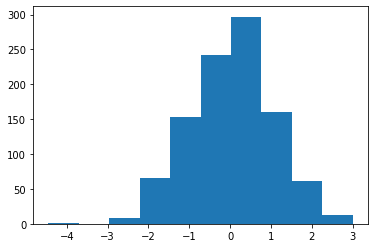

In [3]:
plt.hist(ds1)
plt.savefig('image1.png')
plt.show()

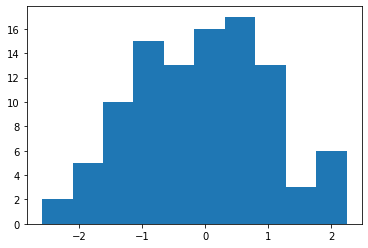

In [4]:
plt.hist(ds2)
plt.savefig('image2.png')
plt.show()

C:\Users\Acer\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
C:\Users\Acer\Anaconda\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


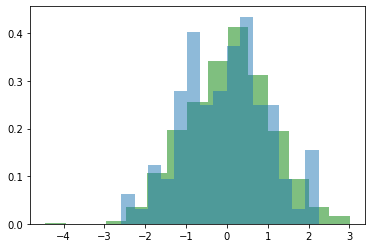

In [5]:
plt.hist(ds1,normed=True,color='green',bins=15,alpha=0.5)
plt.hist(ds2,normed=True, bins=15,alpha=0.5)
plt.savefig('image3.png')
plt.show()

In [6]:
#light green ds1
#blue ds2
#dark green overlapping of blue and green

In [7]:
#sns
ds3 = randn(1000)
ds4 = randn(1000)


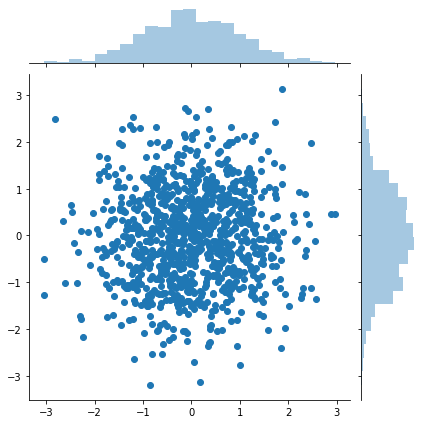

In [8]:
sns_plot = sns.jointplot(ds3,ds4)
sns_plot.savefig('image4.png')

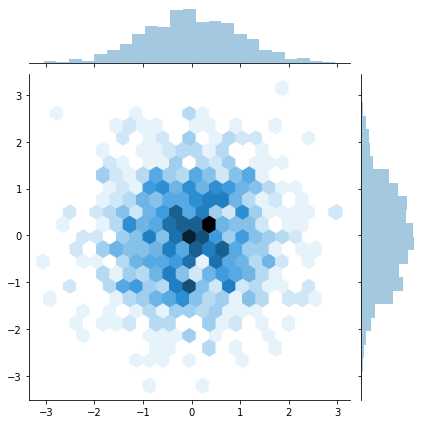

In [9]:
sns_plot2 = sns.jointplot(ds3,ds4,kind ='hex')
sns_plot2.savefig('image5.png')


### KDE - Kernel Density Estimation
##### it estimate the probability density function of random variable.
url = https://en.wikipedia.org/wiki/Kernel_density_estimation
url = https://en.wikipedia.org/wiki/Kernel_(statistics)


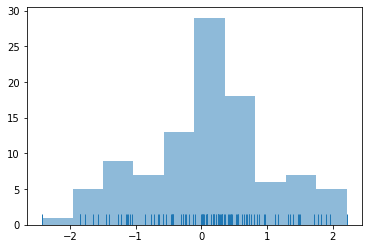

In [12]:
#import relevant libraries

#manually create KDE by Summing the gaussian distribution
ds = randn(100)
sns.rugplot(ds)
plt.hist(ds,alpha=0.5)
plt.savefig('image11.png')


In [15]:
x_axes = np.linspace(ds.min()-1,ds.max()+1,50)

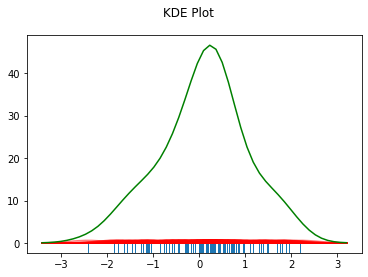

In [20]:
#bandwidth creation
bandwith = ((4*ds.std()**5)/(3*len(ds)))** 0.2

kernels = []

for point in ds:
    kernel = stats.norm(point,bandwith).pdf(x_axes)
    kernels.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel * 0.6
    
    plt.plot(x_axes,kernel,alpha=0.5,color='red')
    
plt.savefig('image21.png')

kde = np.sum(kernels,axis=0)
kde_fig = plt.plot(x_axes,kde,color='green')
sns.rugplot(ds)
plt.suptitle('KDE Plot')
plt.savefig('image31.png')

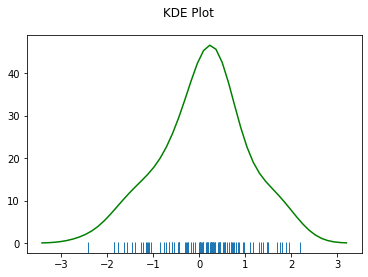

In [17]:
kde = np.sum(kernels,axis=0)
kde_fig = plt.plot(x_axes,kde,color='green')
sns.rugplot(ds)
plt.suptitle('KDE Plot')
plt.savefig('image31.png')

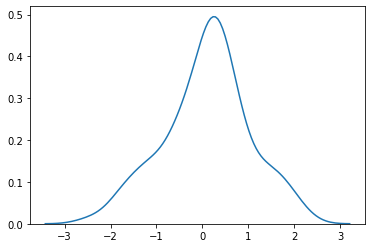

In [22]:
# Using Seaborn: shortcut
kdefig = sns.kdeplot(ds)
fig = kdefig.get_figure()
fig.savefig('image41.png')

### KDE 2

In [23]:
mean = [0,0]
covariance = [[1,0],[0,100]]

ds = np.random.multivariate_normal(mean,covariance,500)


C:\Users\Acer\Anaconda\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


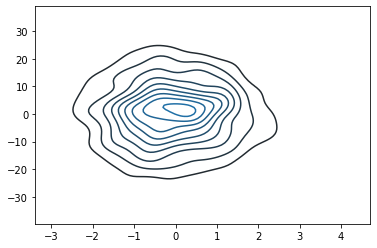

In [24]:
import pandas as pd
from pandas import DataFrame

dframe = pd.DataFrame(ds,columns=['col1','col2'])
fig = sns.kdeplot(dframe).get_figure()
fig.savefig('kde1.png')

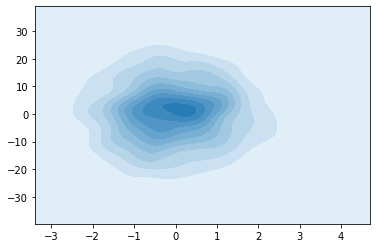

In [25]:
#shade
fig2= sns.kdeplot(dframe,shade=True).get_figure()
fig2.savefig('kde2.png')

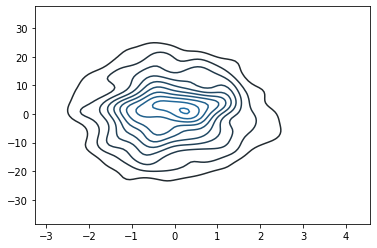

In [27]:
#bandwith change
fig3 = sns.kdeplot(dframe,bw='silverman').get_figure()
fig3.savefig('kde3.png')

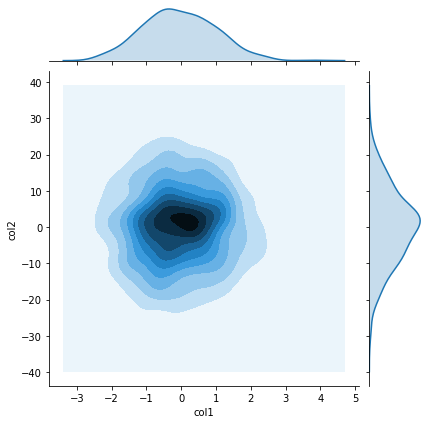

In [28]:
#kind variable
fig4 = sns.jointplot('col1','col2',dframe,kind='kde')
fig4.savefig('kde4.png')

### multiple plot

In [29]:
from pandas import Series

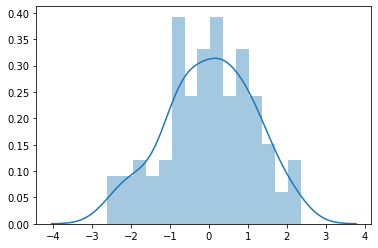

In [30]:
ds = randn(100)
fig = sns.distplot(ds, bins=15).get_figure()
fig.savefig('image111.png')

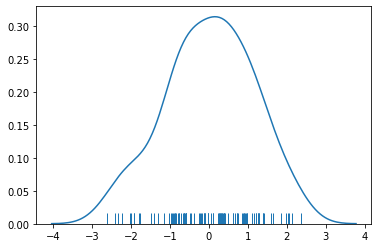

In [35]:
fig2 = sns.distplot(ds,hist=False,rug=True,bins=10).get_figure()
fig2.savefig('image211.png')

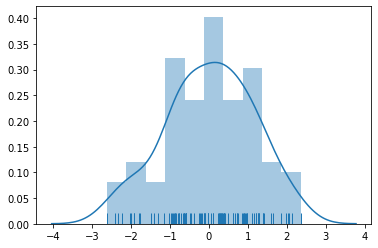

In [36]:
fig2 = sns.distplot(ds,hist=True,rug=True,bins=10).get_figure()
fig2.savefig('image221.png')

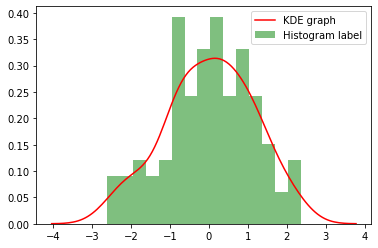

In [37]:
#change parameters of each graph
fig3 = sns.distplot(ds,bins=15,
                   kde_kws = {'color':'red','label':'KDE graph'},
                   hist_kws={'label':'Histogram label','color':'green','alpha':0.5}
                   ).get_figure()
fig3.savefig('image311.png')

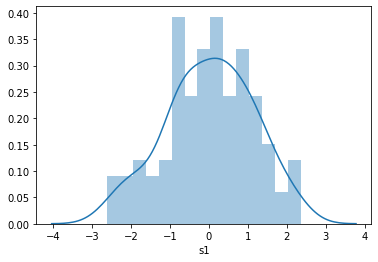

In [38]:
s1 = Series(ds, name='s1')
fig4= sns.distplot(s1,bins=15).get_figure()
fig4.savefig('image411.png')

### box plot

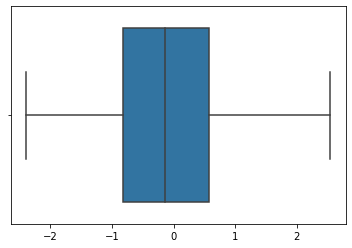

In [40]:
ds1 = randn(100)
sns.boxplot(ds1).get_figure().savefig('box1.png')

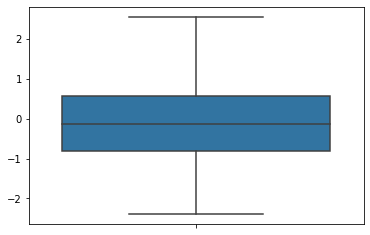

In [43]:
sns.boxplot(ds1, orient='v').get_figure().savefig('box1.png')

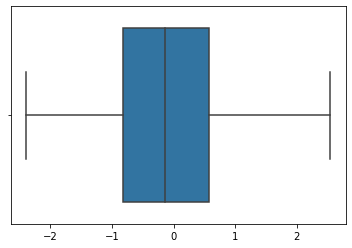

In [44]:
sns.boxplot(ds1,whis=np.inf).get_figure().savefig('box2.png')

### Regression plot

In [45]:
#go to data page= https://github.com/mwaskom/seaborn-data/blob/master/diamonds.csv
#df = sns.load_dataset('diamonds').sample(frac=1).head(100)
#df

#sns.lmplot('price','carat',df).savefig('1.png')

#modify
#sns.lmplot('price','carat',df,scatter_kws={'marker':'o','color':'green'},line_kws={'color':'red','linewidth':1}).savefig('2.png')


#higher order trend line
#sns.lmplot('price','carat',df,order=4,scatter_kws={'marker':'o','color':'green'},line_kws={'color':'red','linewidth':1}).savefig('3.png')

#scatter plot without trend line
#sns.lmplot('price','carat',df,fit_reg=False).savefig('4.png')

#hue arguments
#sns.lmplot('price','carat',df,hue='cut',markers=['^','V','*','.','s']).savefig('5.png')
#sns.lmplot('price','carat',df,hue='cut').savefig('6.png')

#local regression
#sns.lmplot('price','carat',df,lowess=True).savefig('7.png')

#regplot - 
#sns.regplot('price','carat',df).get_figure().savefig('8.png')

#sub plots

#image, (plt1,plt2)=plt.subplot(1,2,Sharey=True)

#sns.regplot('price','carat',df,ax=plt1)
#sns.boxplot(df['carat'],df['depth'],color='green',ax=plt2).savefig('9.png')






### Violin plot

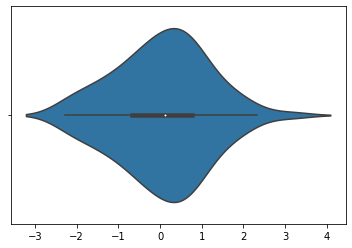

In [46]:
ds = randn(80)

sns.violinplot(ds).get_figure().savefig('violin1.png')

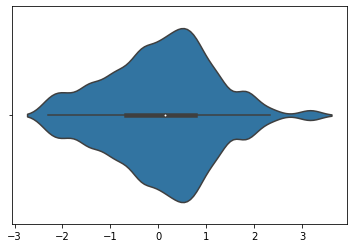

In [47]:
sns.violinplot(ds,bw=0.2).get_figure().savefig('violin2.png')

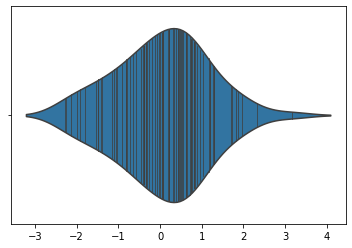

In [48]:
sns.violinplot(ds,inner='stick').get_figure().savefig('violin3.png')

### heatmaps visualization

In [ ]:
#url - https://github.com/mwaskom/seaborn-data/blob/master/flights.csv
#df = sns.load_dataset('flights')
#df2 = df.pivot('year','month','passengers')
#df2

#sns.heatmap(df2).get.figure().savefig('heatmap1.png')

#sns.heatmap(df2,annot=True,fmt='d').get.figure().savefig('heatmap2.png')

#sns.heatmap(df2, center=df2.loc[1955,'January']).get.figure().savefig('heatmap3.png')

### cluster map

In [49]:
#sns.clustermap(df2).savefig('cluster1.png')

#sns.clustermap(df2,col_cluster=False).savefig('cl2.png')

### Standardise by rows

#sns.clustermap(df2,standard_scale=0).savefig('cl4.png')#standard_scale = (0,1),(row,column)
